# <center> Traitement CSV </center>

In [216]:
import pandas as pd
from tqdm.notebook import tqdm_notebook

In [278]:
df= pd.read_csv('test_lib.csv')
df.head()

,Auteur(s),Titre,Edition,Date,ISBN
0,Approche linguistico-mathématique,La Sémiotique formelle du folklore,Contributions de Tudor Bălănescu,1978,1683480177
1,De Paul Beaulier,Pauline,Harmattan,2005,1187920447
2,De Jacques Labescat,Guide des examens complémentaires,Lamarre,2008,1178198467
3,De Stéphane Benhamou,Les années 60 pour les nuls,First,2009,1181494187
4,De Colette Gouvion,Aveyron,Illustrations de Brigitte Julien,2002,1093936187


In [ ]:
# df= pd.read_csv('test_lib.csv')
# df.head()

In [228]:
# Changer la columne en mettant des valeurs absolues 
# df['ISBN'] = df['ISBN'].abs()
# df.to_csv("libraires_webscrap.csv", index=False)

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Auteur(s)  9240 non-null   object
 1   Titre      9240 non-null   object
 2   Edition    9240 non-null   object
 3   Date       9240 non-null   int32 
 4   ISBN       9240 non-null   int64 
dtypes: int32(1), int64(1), object(3)
memory usage: 325.0+ KB


## Convertir la colonne ISBN en int

In [230]:
# # Filtre pour sélectionner les lignes en str
# filtre = df[df['Date'].apply(type) == str]
# filtre

# # Avec les index on peut les supprimer
# df.drop([], axis=0, inplace=True)
# df.to_csv("biblio_leslibraires.csv", index=False)
# df = pd.read_csv("biblio_leslibraires.csv")

# # Enfin, on peut convertir la colonne en int
# df['Date'] = df['Date'].astype(int)

### On récupère l'index des lignes dont l'ISBN n'est pas un nombre

In [747]:
test=[]
index = 0
liste_index = [] 

for isbn in df['ISBN']:
    try :
        x = (int(isbn))
        index +=1
        
    except :
        liste_index.append(index)
        index +=1

In [748]:
# longueur de la liste
len(liste_index)

809

### Suppression des mauvais ISBN

In [751]:
df = pd.read_csv("df_bdd.csv")

In [749]:
 for x in tqdm_notebook(liste_index) :
        df.drop([x], axis=0, inplace=True)
        df.to_csv("df_bdd.csv", index=False)

  0%|          | 0/809 [00:00<?, ?it/s]

In [234]:
# df = pd.read_csv("libraires_webscrap.csv")
# df

In [752]:
# # # Enfin, on peut convertir la colonne en int
df['ISBN'] = df['ISBN'].astype(int)

In [753]:
df['ISBN'].value_counts()

 1919          6
 253965907     2
 1928451399    2
 630653877     2
 1943698989    2
              ..
 1089638327    1
 1865137437    1
 1227886287    1
 1195195527    1
-1083466777    1
Name: ISBN, Length: 13772, dtype: int64

In [754]:
# Valeurs absolues

df['ISBN'] = abs(df['ISBN'])

In [756]:
df['ISBN'].tail(50)

13803      70289627
13804    1888201907
13805    1915009487
13806    1865209677
13807    1715449957
13808     557929529
13809    1229838297
13810    1192760127
13811    1180699247
13812    1639493957
13813    1094536307
13814    1093436807
13815    1089219817
13816    1085414387
13817    1067419727
13818    1020379987
13819    1019947377
13820    1682386407
13821    1190188357
13822    1062676677
13823    1039847427
13824    1805014167
13825    1668486517
13826    1651918577
13827    1645455167
13828    1585369097
13829    1430498697
13830    1131888827
13831    1240587279
13832    1094269247
13833    1091878547
13834    1066889377
13835    1026077327
13836    1092125337
13837    1854291897
13838     984032797
13839    1224494677
13840    1221057417
13841    1187485527
13842    1094389037
13843    1089529277
13844    1082367327
13845     254234067
13846    1723742447
13847    1709342407
13848    1094197547
13849    1682363227
13850    1914951847
13851    1843673987
13852    1083466777


### Suppression des ISBN différent de 978

In [757]:
df[df['ISBN'] <= 9780000000000].value_counts().sum()

13851

In [94]:
# on récupère l'index 
index = df.index
# on récupère les mauvais ISBN
condition = df["ISBN"] < 9780000000000
# on récupère les index
isbn_supp = index[condition]

#### Suppression

In [95]:
 for x in tqdm_notebook(isbn_supp) :
        df.drop([x], axis=0, inplace=True)
        df.to_csv("test_lib.csv", index=False)

  0%|          | 0/196 [00:00<?, ?it/s]

---

### Convertir la colonne 'Date' en int 

#### On récupère l'index des lignes dont l'ISBN n'est pas un nombre

In [240]:
test=[]
index = 0
liste_index = [] 

for date in df['Date']:
    try :
        x = (int(date))
        index +=1
        
    except :
        liste_index.append(index)
        index +=1

In [241]:
len(liste_index)

268

#### Suppression des mauvaises dates

In [242]:
 for x in tqdm_notebook(liste_index) :
        df.drop([x], axis=0, inplace=True)
        df.to_csv("test_lib.csv", index=False)

  0%|          | 0/268 [00:00<?, ?it/s]

In [243]:
df = pd.read_csv("test_lib.csv")

In [244]:
# conversion de la colonne en int
df['Date'] = df['Date'].astype(int)

---

## Concaténation 2 dataframes

In [445]:
# importing pandas
import pandas as pd
  
# merging two csv files
df = pd.concat(
    map(pd.read_csv, ['libraires_webscrap_1.csv', 'libraires_webscrap.csv']), ignore_index=True)

# Sauvegarde
df.to_csv("libraires_webscrap_3.csv", index=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 0 to 3042
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Auteur(s)  3043 non-null   object
 1   Titre      3043 non-null   object
 2   Edition    3043 non-null   object
 3   Date       3043 non-null   int64 
 4   ISBN       3043 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 119.0+ KB


---

## Statistiques et grapiques

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Auteur(s)  9240 non-null   object
 1   Titre      9240 non-null   object
 2   Edition    9240 non-null   object
 3   Date       9240 non-null   int64 
 4   ISBN       9240 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 361.1+ KB


### Suppression des doublons

In [257]:
# Supprimer les doublons
df.drop_duplicates(inplace=True)
df.to_csv("test_lib.csv", index=False)

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9231 entries, 0 to 9239
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Auteur(s)  9231 non-null   object
 1   Titre      9231 non-null   object
 2   Edition    9231 non-null   object
 3   Date       9231 non-null   int64 
 4   ISBN       9231 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 432.7+ KB


### Moyenne sur la Date

In [259]:
print("Moyenne des années :", round(df.Date.mean(), 3))
print("Année minimale :", df.Date.min())
print("Année maximale :", df.Date.max())

Moyenne des années : 1997.482
Année minimale : 2
Année maximale : 2022


#### Suppression des valeurs aberrantes ('Date')

In [260]:
# on récupère l'index 
index = df.index
# on récupère les mauvais ISBN
condition = df["Date"] < 1500
# on récupère les index
date_supp = index[condition]

for x in tqdm_notebook(date_supp) :
        df.drop([x], axis=0, inplace=True)
        df.to_csv("test_lib.csv", index=False)

  0%|          | 0/9 [00:00<?, ?it/s]

### Maison d'édition

#### Nombre de maisons d'édition différentes :

In [262]:
df['Edition'].value_counts().sum()

9231

In [263]:
df['Edition'].value_counts().head(10)

Gallimard                           319
L'Harmattan                         227
Harmattan                           169
Seuil                               150
Le Livre de poche                   125
Flammarion                          110
Nathan                               93
J'ai Lu                              91
Presses universitaires de France     86
Points                               82
Name: Edition, dtype: int64

<AxesSubplot:ylabel='Edition'>

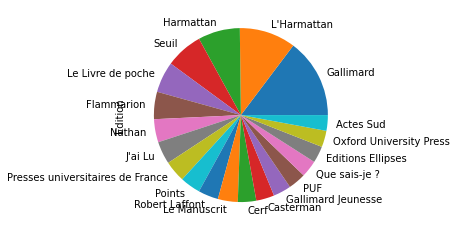

In [264]:
df['Edition'].value_counts().head(20).plot.pie()

## Modification de l'Edition

In [265]:
# replace
df['Edition'] = df['Edition'].str.replace("Éditions Eska", "Eska", regex=False)

# Sauvegarde du csv 
df.to_csv("test_lib.csv", index=False)

In [266]:
df['Edition'].value_counts().head(250)

Gallimard            319
L'Harmattan          227
Harmattan            169
Seuil                150
Le Livre de poche    125
                    ... 
Fixot                  6
France-Empire          6
Anne Carrière          6
LexisNexis             6
Berger-Levrault        6
Name: Edition, Length: 250, dtype: int64

In [267]:
# # remplacer avec l'index
# df.loc[[1552,1584,1641,1665,1686,1688,1721,1763,1764,1790,1791,1807,1812,1821,1833], "Edition"] = "Harmattant ('L')"

# # Sauvegarde du csv 
# df.to_csv("libraires_webscrap.csv", index=False)

## 'Auteur'

In [268]:
df['Auteur(s)'].value_counts().sum()

9231

<AxesSubplot:ylabel='Auteur(s)'>

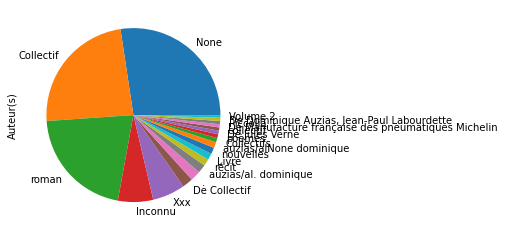

In [269]:
df['Auteur(s)'].value_counts().head(20).plot.pie()

## Modifications 'Auteur'

In [197]:
# replace
df['Auteur(s)'] = df['Auteur(s)'].str.replace(".", "None", regex=False)

# Sauvegarde du csv 
df.to_csv("test_lib.csv", index=False)

In [198]:
df['Auteur(s)'].value_counts().head(10)

None                                                  276
Collectif                                             106
auzias/alNone dominique                                11
Barbara Cartland                                        5
Phaidon                                                 4
De Jean d'Ormesson                                      4
De James Hadley Chase                                   3
De Bernard Vargaftig                                    3
De Prosper Mérimée                                      3
De Manufacture française des pneumatiques Michelin      3
Name: Auteur(s), dtype: int64

In [201]:
filtre = df[df['Auteur(s)'] == 'None']
filtre.head(2)

,Auteur(s),Titre,Edition,Date,ISBN
12,None,Pogrom,Flammarion,2004,9782080686541
30,None,Tom est mort,P.O.L.,2007,9782846822091


---

# Récupérer informations via les librairies python

In [207]:
liste_ISBN = [x for x in df['ISBN']]
len(liste_ISBN)

3695

In [209]:
import pandas as pd
from isbnlib import canonical, meta
import csv
from tqdm.notebook import tqdm_notebook

In [210]:
## Création du csv 
header = ['Auteur(s)', 'Titre', 'Edition', 'Date', 'ISBN']
with open(r'libraires_ISBN.csv', 'a') as f:
    writer = csv.writer(f)
        # write the header
    writer.writerow(header)
    print("fichier créé")

fichier créé


In [215]:
# liste recueillant les ISBN (par défaut 'liste_ISBN')

# MODIFICATION DE LA SOURCE
SERVICE = 'worldcat'
    
nombre_livres = 0
liste_ref = []
curseur = 0
ISBN = []
ISBN_manquants = []

for x in tqdm_notebook(liste_ISBN) :
    try:
        isbn = canonical(str(x))
        data = meta(isbn, SERVICE)
        nombre_livres += 1
    
    
        biblio = []
        
        if len(data["Authors"]) == 1 :
            for x in data["Authors"] :
                biblio.append(x)
        else : 
            biblio.append(data["Authors"])
            
        biblio.append(data["Title"])
        biblio.append(data["Publisher"])
        biblio.append(data["Year"])
        biblio.append(data['ISBN-13'])

        
        ISBN.append(biblio)
        
    except : 
            print("ISBN introuvable", x)
            
        

print("-------------------------------")
print("Nombre de livres dans la liste : ", nombre_livres)
print("-------------------------------")
print("Nombre d'ISBN qui n'ont pas été trouvés :", len(ISBN_manquants))
print("-------------------------------")
print(ISBN_manquants)
print("-------------------------------")
print("Insertion dans le csv...")
    
with open(r'libraires_ISBN.csv', 'a', encoding='UTF8') as f:
        for x in tqdm_notebook(ISBN) :
            writer = csv.writer(f)
            writer.writerow(x)
    
        print("Insertion des données réussies.")

  0%|          | 0/3695 [00:00<?, ?it/s]

ISBN introuvable 9782290040461
ISBN introuvable 9782221026991
ISBN introuvable 9783791334141
ISBN introuvable 9782737654121
ISBN introuvable 9782850085291
ISBN introuvable 9782070297931
ISBN introuvable 9782211015691
ISBN introuvable 9782282300771
ISBN introuvable 9782735289141
ISBN introuvable 9782081213401
ISBN introuvable 9782207221211
ISBN introuvable 9782876146051
ISBN introuvable 9782700741711
ISBN introuvable 9782070264681
ISBN introuvable 9782873881351
ISBN introuvable 9782070254491
ISBN introuvable 9782200906641
ISBN introuvable 9782503504971
ISBN introuvable 9782130467441
ISBN introuvable 9782070225651
ISBN introuvable 9782845032361
ISBN introuvable 9782742779451
ISBN introuvable 9782842786281
ISBN introuvable 9782850900181
ISBN introuvable 9782070236671
ISBN introuvable 9782748165661
ISBN introuvable 9782304001921
ISBN introuvable 9782070230181
ISBN introuvable 9782130566861
ISBN introuvable 9782723457071
ISBN introuvable 9782020029841
ISBN introuvable 9782911698491
ISBN int

ISBN introuvable 9782702013601
ISBN introuvable 9782748198201
ISBN introuvable 9782746903531
ISBN introuvable 9782070238101
ISBN introuvable 9782859191931
ISBN introuvable 9782910565701
ISBN introuvable 9782701123691
ISBN introuvable 9782747551861
ISBN introuvable 9782130316671
ISBN introuvable 9782252005071
ISBN introuvable 9782713210471
ISBN introuvable 9782874590221
ISBN introuvable 9782070284771
ISBN introuvable 9782207281871
ISBN introuvable 9782707304391
ISBN introuvable 9782203934351
ISBN introuvable 9782254685561
ISBN introuvable 9782748305821
ISBN introuvable 9782748315011
ISBN introuvable 9782212056761
ISBN introuvable 9782070259311
ISBN introuvable 9782809500301
ISBN introuvable 9782748175141
ISBN introuvable 9782748330571
ISBN introuvable 9782872420681
ISBN introuvable 9782013217651
ISBN introuvable 9782717700541
ISBN introuvable 9782910879501
ISBN introuvable 9782222965411
ISBN introuvable 9782070263851
ISBN introuvable 9782853710381
ISBN introuvable 9782232116551
ISBN int

ISBN introuvable 9782758301721
ISBN introuvable 9782746006591
ISBN introuvable 9782070581061
ISBN introuvable 9782091871431
ISBN introuvable 9782841149131
ISBN introuvable 9782713205811
ISBN introuvable 9782070754021
ISBN introuvable 9782070234691
ISBN introuvable 9782070296071
ISBN introuvable 9782222967101
ISBN introuvable 9782080507471
ISBN introuvable 9782130431121
ISBN introuvable 9782207305751
ISBN introuvable 9782290321751
ISBN introuvable 9782844943231
ISBN introuvable 9782221017531
ISBN introuvable 9782275023441
ISBN introuvable 9782724700831
ISBN introuvable 9782296008731
ISBN introuvable 9782873400521
ISBN introuvable 9782207226261
ISBN introuvable 9782221090121
ISBN introuvable 9782748332391
ISBN introuvable 9782841297511
ISBN introuvable 9782080120441
ISBN introuvable 9782708880641
ISBN introuvable 9782746912601
ISBN introuvable 9782913376601
ISBN introuvable 9782070223091
ISBN introuvable 9782070265251
ISBN introuvable 9782841381791
ISBN introuvable 9782070349661
ISBN int

  0%|          | 0/3091 [00:00<?, ?it/s]

Insertion des données réussies.


In [700]:
df = pd.read_csv("libraires_ISBN.csv")
df.head()

,Auteur(s),Titre,Edition,Date,ISBN
0,Tudor Bălănescu,La sémiotique formelle du folklore: approche ...,Editura Academiei,1978,9782252020111
1,Paul Beaulier,PAULINE,Harmattan,2005,9782747579841
2,Jacques Labescat,Guide des examens complémentaires,Lamarre,2008,9782757301821
3,Stéphane Benhamou,Les années 60,First éd.,2009,9782754006101
4,"['Colette Gouvion', 'Brigitte Julien']",Aveyron,Rouergue,2002,9782841564101


In [710]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2926 entries, 0 to 2925
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Auteur(s)  2925 non-null   object
 1   Titre      2926 non-null   object
 2   Edition    2926 non-null   object
 3   Date       2926 non-null   int32 
 4   ISBN       2926 non-null   int64 
dtypes: int32(1), int64(1), object(3)
memory usage: 103.0+ KB


### Convertir la colonne 'Date' en int 

#### On récupère l'index des lignes dont l'ISBN n'est pas un nombre

In [702]:
test=[]
index = 0
liste_index = [] 

for date in df['Date']:
    try :
        x = (int(date))
        index +=1
        
    except :
        liste_index.append(index)
        index +=1
        
len(liste_index)

165

In [703]:
liste_index

[1206,
 1207,
 1213,
 1214,
 1218,
 1222,
 1229,
 1231,
 1238,
 1240,
 1261,
 1310,
 1314,
 1315,
 1322,
 1339,
 1350,
 1351,
 1367,
 1370,
 1382,
 1384,
 1406,
 1411,
 1430,
 1459,
 1469,
 1471,
 1475,
 1568,
 1595,
 1603,
 1621,
 1643,
 1644,
 1671,
 1684,
 1694,
 1696,
 1697,
 1710,
 1722,
 1737,
 1751,
 1766,
 1770,
 1784,
 1802,
 1809,
 1825,
 1840,
 1852,
 1853,
 1872,
 1891,
 1918,
 1931,
 1939,
 1941,
 1945,
 1949,
 1953,
 1967,
 1980,
 2000,
 2005,
 2017,
 2056,
 2057,
 2075,
 2084,
 2085,
 2095,
 2103,
 2104,
 2109,
 2110,
 2124,
 2135,
 2148,
 2154,
 2163,
 2164,
 2167,
 2171,
 2197,
 2198,
 2239,
 2243,
 2249,
 2255,
 2282,
 2295,
 2298,
 2341,
 2364,
 2369,
 2371,
 2381,
 2383,
 2392,
 2412,
 2415,
 2428,
 2442,
 2499,
 2513,
 2519,
 2520,
 2521,
 2528,
 2529,
 2532,
 2549,
 2559,
 2570,
 2577,
 2589,
 2590,
 2596,
 2597,
 2616,
 2618,
 2620,
 2643,
 2657,
 2660,
 2671,
 2675,
 2684,
 2699,
 2702,
 2720,
 2745,
 2752,
 2762,
 2768,
 2781,
 2789,
 2799,
 2800,
 2804,
 2821,

In [473]:
# # replace
# df['Date'] = df['Date'].str.replace("DL", "", regex=False)

# # Sauvegarde du csv 
# df.to_csv("libraires_ISBN.csv", index=False)

#### Suppression des mauvaises dates

In [706]:
 for x in tqdm_notebook(liste_index) :
        df.drop([x], axis=0, inplace=True)
        df.to_csv("libraires_ISBN.csv", index=False)

  0%|          | 0/165 [00:00<?, ?it/s]

In [707]:
df = pd.read_csv("libraires_ISBN.csv")

In [708]:
# conversion de la colonne en int
df['Date'] = df['Date'].astype(int)

In [709]:
df['Date'].value_counts().head(30)

2006    244
2008    240
1999    240
2007    238
2005    214
2004    209
2002    168
2003    162
2001    140
2000    135
1998     88
1997     69
1994     65
1996     65
1995     64
1993     43
1991     38
1992     38
1990     35
2009     33
1989     31
1988     22
1986     21
1984     21
2010     21
1987     21
1983     17
1982     13
2011     13
2014     12
Name: Date, dtype: int64

#### Statistiques 

In [720]:
print("Moyenne :", round(df['Date'].mean(), 2))
print("Min :", df.Date.min())
print('Max :', df.Date.max())

Moyenne : 2000.99
Min : 1885
Max : 2020


In [719]:
# suppression des dates aberrantes 

# # on récupère l'index 
# index = df.index
# # on récupère les mauvais ISBN
# condition = df["Date"] > 2025
# # on récupère les index
# date_supp = index[condition]

# for x in tqdm_notebook(date_supp) :
#         df.drop([x], axis=0, inplace=True)
#         df.to_csv("libraires_ISBN.csv", index=False)

  0%|          | 0/89 [00:00<?, ?it/s]

In [721]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2837 entries, 0 to 2925
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Auteur(s)  2836 non-null   object
 1   Titre      2837 non-null   object
 2   Edition    2837 non-null   object
 3   Date       2837 non-null   int32 
 4   ISBN       2837 non-null   int64 
dtypes: int32(1), int64(1), object(3)
memory usage: 121.9+ KB


In [722]:
df

,Auteur(s),Titre,Edition,Date,ISBN
0,Tudor Bălănescu,La sémiotique formelle du folklore: approche ...,Editura Academiei,1978,9782252020111
1,Paul Beaulier,PAULINE,Harmattan,2005,9782747579841
2,Jacques Labescat,Guide des examens complémentaires,Lamarre,2008,9782757301821
3,Stéphane Benhamou,Les années 60,First éd.,2009,9782754006101
4,"['Colette Gouvion', 'Brigitte Julien']",Aveyron,Rouergue,2002,9782841564101
...,...,...,...,...,...
2921,Jean-Paul Eluther,Guide pratique d'analyse financière des colle...,Ed. de La Lettre territorial,1999,9782841302741
2922,Janine Boissard,Belle-grand-mère: roman,Fayard,1999,9782253137061
2923,James D. Keyser,L'art des Indiens des Grandes Plaines,Seuil,2004,9782020548441
2924,Catherine Baroin,Latin: 4e,Nathan,1999,9782091826301


In [723]:
df2 = pd.read_csv("test_lib.csv")
df2

,Auteur(s),Titre,Edition,Date,ISBN
0,Approche linguistico-mathématique,La Sémiotique formelle du folklore,Contributions de Tudor Bălănescu,1978,1683480177
1,De Paul Beaulier,Pauline,Harmattan,2005,1187920447
2,De Jacques Labescat,Guide des examens complémentaires,Lamarre,2008,1178198467
3,De Stéphane Benhamou,Les années 60 pour les nuls,First,2009,1181494187
4,De Colette Gouvion,Aveyron,Illustrations de Brigitte Julien,2002,1093936187
...,...,...,...,...,...
11985,De Michel Milcent,Le lemming,Les deux encres,2005,9782912975911
11986,"histoire d'un grand ensemble, 1953-2003","Billardon, histoire d'un grand ensemble",Créaphis,2004,9782913610521
11987,Collectif,L'Année psychologique - vol. 108 (1/2008),Armand Colin,305 g,Armand Colin
11988,De Christine Wystup,Bordel de Dieu,Art et Comédie,2005,9782844224651


In [762]:
import pandas as pd
s1 = pd.read_csv("test_lib.csv")
s2= pd.read_csv("libraires_ISBN.csv")
test = pd.concat([s1, s2], ignore_index=False)

In [763]:
test.tail()

,Unnamed: 0,Auteur(s),Titre,Edition,Date,ISBN
2832,NaN,Jean-Paul Eluther,Guide pratique d'analyse financière des colle...,Ed. de La Lettre territorial,1999,9782841302741
2833,NaN,Janine Boissard,Belle-grand-mère: roman,Fayard,1999,9782253137061
2834,NaN,James D. Keyser,L'art des Indiens des Grandes Plaines,Seuil,2004,9782020548441
2835,NaN,Catherine Baroin,Latin: 4e,Nathan,1999,9782091826301
2836,NaN,Christine van Rogger-Andréucci,Poésie et religion dans l'œuvre de Max Jacob,H. Champion,1994,9782852033511


In [737]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14827 entries, 0 to 14826
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Auteur(s)  14825 non-null  object
 1   Titre      14827 non-null  object
 2   Edition    14827 non-null  object
 3   Date       14827 non-null  object
 4   ISBN       14827 non-null  object
dtypes: object(5)
memory usage: 579.3+ KB


In [764]:
test.to_csv("df_bdd.csv")

In [739]:
df = pd.read_csv("df_bdd.csv")

In [758]:
df.tail()

,Unnamed: 0,Auteur(s),Titre,Edition,Date,ISBN
13848,14822,Jean-Paul Eluther,Guide pratique d'analyse financière des colle...,Ed. de La Lettre territorial,1999,1094197547
13849,14823,Janine Boissard,Belle-grand-mère: roman,Fayard,1999,1682363227
13850,14824,James D. Keyser,L'art des Indiens des Grandes Plaines,Seuil,2004,1914951847
13851,14825,Catherine Baroin,Latin: 4e,Nathan,1999,1843673987
13852,14826,Christine van Rogger-Andréucci,Poésie et religion dans l'œuvre de Max Jacob,H. Champion,1994,1083466777
